## 1. Google Play Store apps and reviews

<p><img src="https://assets.datacamp.com/production/project_619/img/google_play_store.png" alt="Google Play logo"></p>

Aplikasi seluler ada di mana-mana. Mereka mudah dibuat dan bisa menguntungkan. Karena dua faktor ini, semakin banyak aplikasi yang dikembangkan. Dalam proyek ini, Anda akan melakukan analisis komprehensif tentang pasar aplikasi Android dengan membandingkan lebih dari sepuluh ribu aplikasi di Google Play di berbagai kategori. Anda akan mencari wawasan dalam data untuk menyusun strategi untuk mendorong pertumbuhan dan retensi.

Mari kita lihat datanya, yang terdiri dari dua file:

* `apps.csv`: berisi semua detail aplikasi di Google Play. Ada 13 fitur yang menggambarkan aplikasi yang diberikan.
* `user_reviews.csv`: berisi 100 ulasan untuk setiap aplikasi, ( [*most helpful first*](https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/) ). Teks dalam setiap ulasan telah diproses sebelumnya dan dikaitkan dengan tiga fitur baru: Sentimen (Positif, Negatif atau Netral), Sentimen Polaritas dan Subjektivitas Sentimen.

In [51]:
# Read in dataset
import pandas as pd
apps_with_duplicates = pd.read_csv('datasets/apps.csv')

In [24]:
# Drop duplicates
apps = apps_with_duplicates.drop_duplicates()

In [25]:
# Print the total number of apps
print('Total number of apps in the dataset = ', apps.shape[0])

Total number of apps in the dataset =  9659


In [26]:
# Have a look at a random sample of 5 rows
n = 5
apps.sample(n)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8365,9490,WiFi Tether Router,COMMUNICATION,4.2,5599,1.3M,"100,000+",Paid,$2.90,Everyone,Communication,"July 2, 2018",6.2.7,1.6 and up
1277,1565,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100M,"10,000,000+",Free,0,Everyone,Lifestyle;Pretend Play,"July 16, 2018",9.0,4.0 and up
4446,5406,A. O. Smith,TOOLS,4.2,32,33M,"10,000+",Free,0,Everyone,Tools,"May 21, 2018",3.0.22,4.0 and up
5251,6250,BH Rocking,TRAVEL_AND_LOCAL,NaN,13,3.2M,100+,Free,0,Everyone,Travel & Local,"January 17, 2018",1.0.7,4.1 and up
7660,8776,Dr. Gomoku,GAME,3.9,85317,4.5M,"5,000,000+",Free,0,Everyone,Board,"January 15, 2018",1.54,4.0.3 and up


## 2. Data cleaning

Tiga fitur yang akan kami kerjakan paling sering untuk selanjutnya adalah `Install`, `Size`, dan `Price`. Kalau dilihat sekilas dari dataset mengungkapkan bahwa beberapa kolom ini mengharuskan pembersihan data untuk dikonsumsi oleh kode yang akan kita tulis nanti. Secara khusus, keberadaan karakter khusus (`, $ +`) dan huruf (`M k`) di kolom `Install`, `Size`, dan `Price` membuat konversi mereka ke tipe data numerik menjadi sulit. Mari kita bersihkan dengan menghapus ini dan mengonversi setiap kolom ke tipe numerik.

In [28]:
# List of characters to remove
chars_to_remove = ['+', ',', 'M', '$']
# List of column names to clean
cols_to_clean = ['Installs', 'Size', 'Price']

# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    for char in chars_to_remove:
        apps[col] = apps[col].str.replace(char, '')
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col])

## 3. Exploring app categories

Dengan lebih dari 1 miliar pengguna aktif di 190 negara di seluruh dunia, Google Play terus menjadi platform distribusi penting untuk membangun pemirsa global. Agar bisnis mendapatkan aplikasi mereka di depan pengguna, penting untuk membuatnya lebih mudah ditemukan di Google Play. Untuk meningkatkan pengalaman pencarian secara keseluruhan, Google telah memperkenalkan konsep pengelompokan aplikasi ke dalam kategori.

Ini membawa kita ke pertanyaan-pertanyaan berikut:

* Kategori mana yang memiliki aplikasi (aktif) terbanyak di pasar?
* Apakah ada kategori tertentu yang mendominasi pasar?
* Kategori mana yang memiliki jumlah aplikasi paling sedikit?

Kita akan melihat bahwa ada `33` kategori aplikasi unik yang ada dalam dataset kami. Aplikasi *Keluarga* dan *Game* memiliki prevalensi pasar tertinggi. Menariknya, *Tools*, *Bisnis* dan aplikasi *Medis* juga ada di atas.

In [ ]:
# Install plotly
!pip install plotly

In [33]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33


## 4. Distribution of app ratings

Setelah menyaksikan pangsa pasar untuk setiap kategori aplikasi, mari kita lihat kinerja semua aplikasi ini secara rata-rata. Peringkat aplikasi (pada skala 1 hingga 5) berdampak pada kemampuan menemukan, konversi aplikasi, serta citra merek perusahaan secara keseluruhan. Peringkat adalah indikator kinerja utama suatu aplikasi.

Dari penelitian kami, kami menemukan bahwa volume rata-rata peringkat di semua kategori aplikasi adalah `4.17`. Plot histogram miring ke kanan yang menunjukkan bahwa sebagian besar aplikasi berperingkat tinggi dengan hanya beberapa pengecualian di aplikasi berperingkat rendah.

In [34]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387994


## 5. Size and price of an app

Sekarang mari kita periksa ukuran aplikasi dan harga aplikasi. Untuk ukuran, jika aplikasi seluler terlalu besar, mungkin sulit dan/atau mahal bagi pengguna untuk mengunduh. Waktu unduhan yang lama dapat mematikan pengguna bahkan sebelum mereka merasakan aplikasi seluler Anda. Plus, setiap perangkat pengguna memiliki jumlah ruang disk yang terbatas. Untuk harga, beberapa pengguna mengharapkan aplikasi mereka gratis atau murah. Masalah-masalah ini bertambah jika negara berkembang adalah bagian dari target pasar Anda; terutama karena kecepatan internet, daya penghasilan dan nilai tukar.

Bagaimana kita bisa secara efektif menemukan strategi untuk mengukur dan memberi harga pada aplikasi kita?

* Apakah ukuran aplikasi memengaruhi peringkatnya?
* Apakah pengguna benar-benar peduli dengan aplikasi yang memperberat sistem atau mereka lebih suka aplikasi berbobot ringan?
* Apakah harga suatu aplikasi memengaruhi peringkatnya?
* Apakah pengguna selalu lebih suka aplikasi gratis daripada aplikasi berbayar?

Kami menemukan bahwa sebagian besar aplikasi berperingkat teratas (peringkat lebih dari 4) berkisar dari 2 MB hingga 20 MB. Kami juga menemukan bahwa sebagian besar aplikasi harganya di bawah $10.

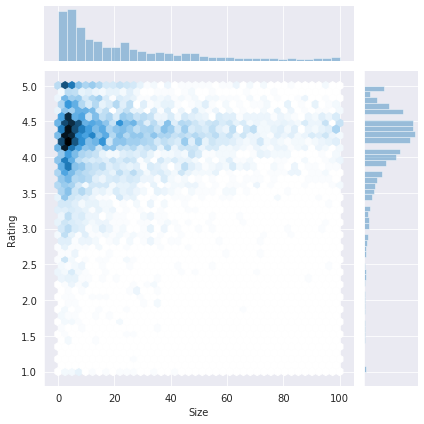

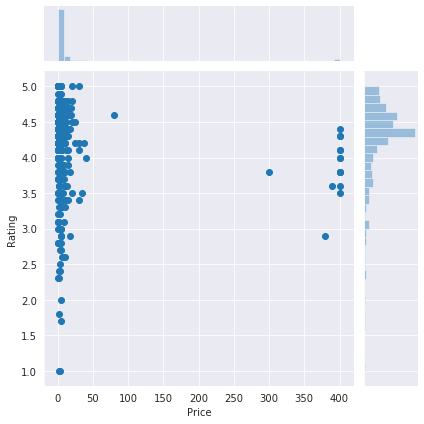

In [35]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Subset for categories with at least 250 apps
large_categories = apps.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex')

# Subset out apps whose type is 'Paid'
paid_apps = apps[apps['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

## 6. Relation between app category and app price

Jadi sekarang sampai pada bagian yang sulit. Bagaimana perusahaan dan pengembang seharusnya memenuhi kebutuhan? Strategi monetisasi apa yang dapat digunakan perusahaan untuk memaksimalkan laba? Biaya aplikasi sebagian besar didasarkan pada fitur, kompleksitas, dan platform.

Ada banyak faktor yang perlu dipertimbangkan ketika memilih strategi penetapan harga yang tepat untuk aplikasi seluler Anda. Penting untuk mempertimbangkan kesediaan pelanggan Anda untuk membayar aplikasi Anda. Harga yang salah dapat memutuskan kesepakatan sebelum unduhan bahkan terjadi. Pelanggan potensial dapat dimatikan oleh apa yang mereka anggap sebagai biaya yang mengejutkan, atau mereka mungkin menghapus aplikasi yang mereka unduh setelah menerima terlalu banyak iklan atau hanya tidak mendapatkan nilai uang mereka.

Berbagai kategori menuntut kisaran harga yang berbeda. Beberapa aplikasi yang sederhana dan digunakan setiap hari, seperti aplikasi kalkulator, mungkin harus tetap gratis. Namun, masuk akal untuk mengenakan biaya untuk aplikasi medis yang sangat khusus untuk mendiagnosis pasien diabetes. Di bawah, kita melihat bahwa aplikasi Medis dan Keluarga adalah yang paling mahal. Beberapa aplikasi medis bahkan memberikan harga hingga `$80`, Semua aplikasi game diberi harga di bawah `$20`.

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


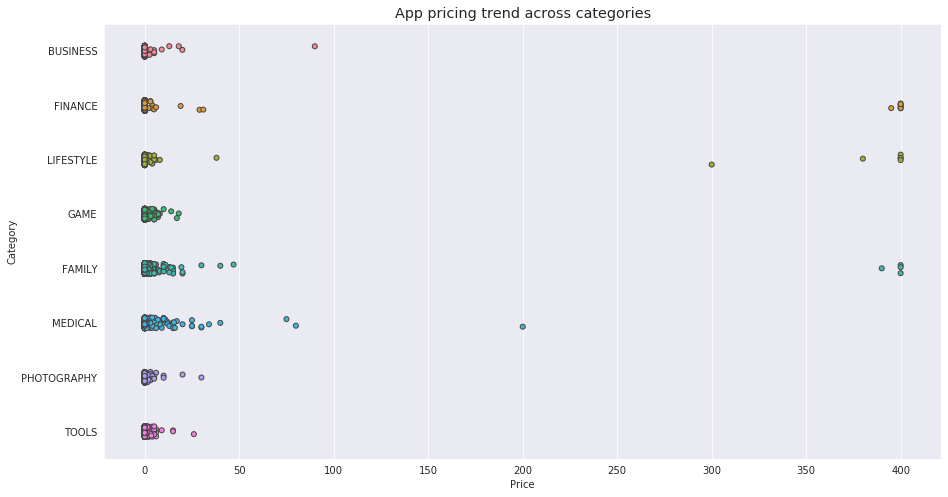

In [39]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
# Set style
plt.style.use('ggplot')

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200

## 7. Filter out "junk" apps

Sepertinya banyak aplikasi yang sangat mahal adalah aplikasi "junk". Yaitu, aplikasi yang tidak benar-benar memiliki tujuan. Beberapa pengembang aplikasi dapat membuat aplikasi bernama *I Am Rich Premium* atau *most expensive app (H)* hanya untuk lelucon atau untuk menguji keterampilan pengembangan aplikasi mereka. Beberapa pengembang bahkan melakukan ini dengan niat jahat dan mencoba menghasilkan uang dengan berharap orang tidak sengaja mengeklik pembelian di aplikasi mereka di toko.

Mari saring aplikasi sampah ini dan lakukan visualisasi ulang. Distribusi aplikasi di bawah $20 menjadi lebih jelas.

In [44]:
popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] < 100].head(10)

,Category,App,Price
187,BUSINESS,Visual Voicemail by MetroPCS,0.0
188,BUSINESS,Indeed Job Search,0.0
189,BUSINESS,Uber Driver,0.0
190,BUSINESS,ADP Mobile Solutions,0.0
191,BUSINESS,Snag - Jobs Hiring Now,0.0
192,BUSINESS,Docs To Go™ Free Office Suite,0.0
193,BUSINESS,Google My Business,0.0
194,BUSINESS,OfficeSuite : Free Office + PDF Editor,0.0
195,BUSINESS,USPS MOBILE®,0.0
196,BUSINESS,Job Search by ZipRecruiter,0.0


Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

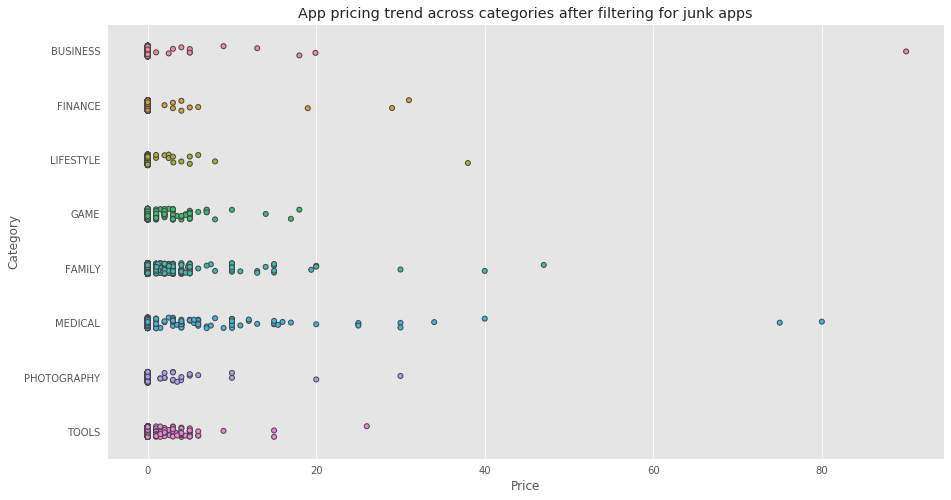

In [41]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps
ax = sns.stripplot(x='Price', y='Category', data=apps_under_100,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

## 8. Popularity of paid apps vs free apps

Untuk aplikasi di Play Store hari ini, ada lima jenis strategi penetapan harga: `free`, `freemium`, `paid`, `paymium`, dan `subscription`. Mari fokus pada aplikasi gratis dan berbayar saja. Beberapa karakteristik aplikasi gratis adalah:

* Gratis untuk diunduh.
* Sumber penghasilan utama seringkali berasal dari iklan.
* Sering dibuat oleh perusahaan yang memiliki produk lain dan aplikasi berfungsi sebagai perpanjangan dari produk tersebut.
* Dapat berfungsi sebagai alat untuk retensi pelanggan, komunikasi, dan layanan pelanggan.

Beberapa karakteristik aplikasi berbayar adalah:

* Pengguna diminta membayar satu kali untuk mengunduh dan menggunakannya.
* Pengguna tidak dapat menggunakan aplikasi sebelum membelinya.

Apakah aplikasi berbayar dipasang sebanyak aplikasi gratis? Ternyata aplikasi berbayar memiliki jumlah pemasangan yang relatif lebih rendah daripada aplikasi gratis, meskipun perbedaannya tidak setajam yang saya harapkan!

In [45]:
trace0 = go.Box(
    # Data for paid apps
    y=apps['Installs'][apps['Type'] == 'Paid'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps['Installs'][apps['Type'] == 'Free'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

## 9. Sentiment analysis of user reviews

Menambang data ulasan pengguna untuk menentukan bagaimana perasaan orang tentang produk, merek, atau layanan Anda dapat dilakukan dengan menggunakan teknik yang disebut sentimen analisis. Ulasan pengguna untuk aplikasi dapat dianalisis untuk mengidentifikasi apakah mood positif, negatif atau netral tentang aplikasi itu. Misalnya, kata-kata positif dalam ulasan aplikasi mungkin menyertakan kata-kata seperti *'amazing', 'friendly', 'good', 'great', dan 'love'*. Kata-kata negatif mungkin berupa kata-kata seperti *'malware', 'hate', 'problem', 'refund', dan 'incompetent'*.

Dengan plotting skor polaritas sentimen ulasan pengguna untuk aplikasi berbayar dan gratis, kami mengamati bahwa aplikasi gratis menerima banyak komentar keras, seperti yang ditunjukkan oleh pencilan/outliers pada sumbu y negatif. Ulasan untuk aplikasi berbayar tampaknya tidak pernah sangat negatif. Ini mungkin menunjukkan sesuatu tentang kualitas aplikasi, mis., Aplikasi berbayar memiliki kualitas lebih tinggi daripada aplikasi gratis rata-rata. Skor polaritas rata-rata untuk aplikasi berbayar sedikit lebih tinggi daripada aplikasi gratis, sehingga disinkronkan dengan pengamatan kami sebelumnya.

Di notebook ini, kami menganalisis lebih dari sepuluh ribu aplikasi dari Google Play Store. Kami dapat menggunakan temuan ini untuk menginformasikan keputusan jika kami ingin membuat aplikasi sendiri.

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

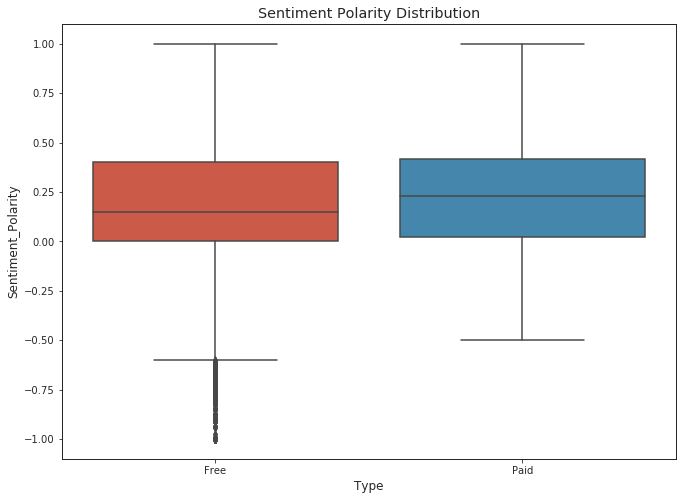

In [50]:
# Load user_reviews.csv
reviews_df = pd.read_csv('datasets/user_reviews.csv')

# Join and merge the two dataframe
merged_df = pd.merge(apps, reviews_df, on = 'App', how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')